In [1]:
import pandas as pd

# Load the dataset
file_path = 'blogs.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head(), df.info(), df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


(                                                Data       Labels
 0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
 2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
 3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism,
 None,
                                                      Data       Labels
 count                                                2000         2000
 unique                                               2000           20
 top     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
 freq                                                    1          100)

In [2]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer

# Define a function for basic preprocessing
def basic_preprocess(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    # Join tokens back to string
    text = ' '.join(tokens)
    return text

# Apply basic preprocessing to the 'Data' column
df['Processed_Data'] = df['Data'].apply(basic_preprocess)

# Display the first few rows of the dataframe after preprocessing
df[['Data', 'Processed_Data', 'Labels']].head()

Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                      Processed_Data       Labels  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  
1  newsgroups altatheism path cantaloupesrvcscmue...  alt.atheism  
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...  alt.atheism  
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...  alt.atheism  
4  xref cantaloupesrvcscmuedu altatheism53485 tal...  alt.atheism

In [3]:
# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text data
X = tfidf_vectorizer.fit_transform(df['Processed_Data'])

# Convert the labels to a numerical format
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Labels'])

# Display the shape of the TF-IDF matrix and the first few labels
X.shape, y[:5]

((2000, 56536), array([0, 0, 0, 0, 0]))

In [4]:
from sklearn.model_selection import train_test_split
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB
# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()


In [5]:
# Train the model on the training set
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

In [6]:
from sklearn.metrics import classification_report, accuracy_score
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.82
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.68      0.83      0.75        18
 comp.os.ms-windows.misc       0.95      0.82      0.88        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.95      0.89        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.84      0.89      0.86        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       0.62      0.81      0.70        16
                 sci.med       0.94  

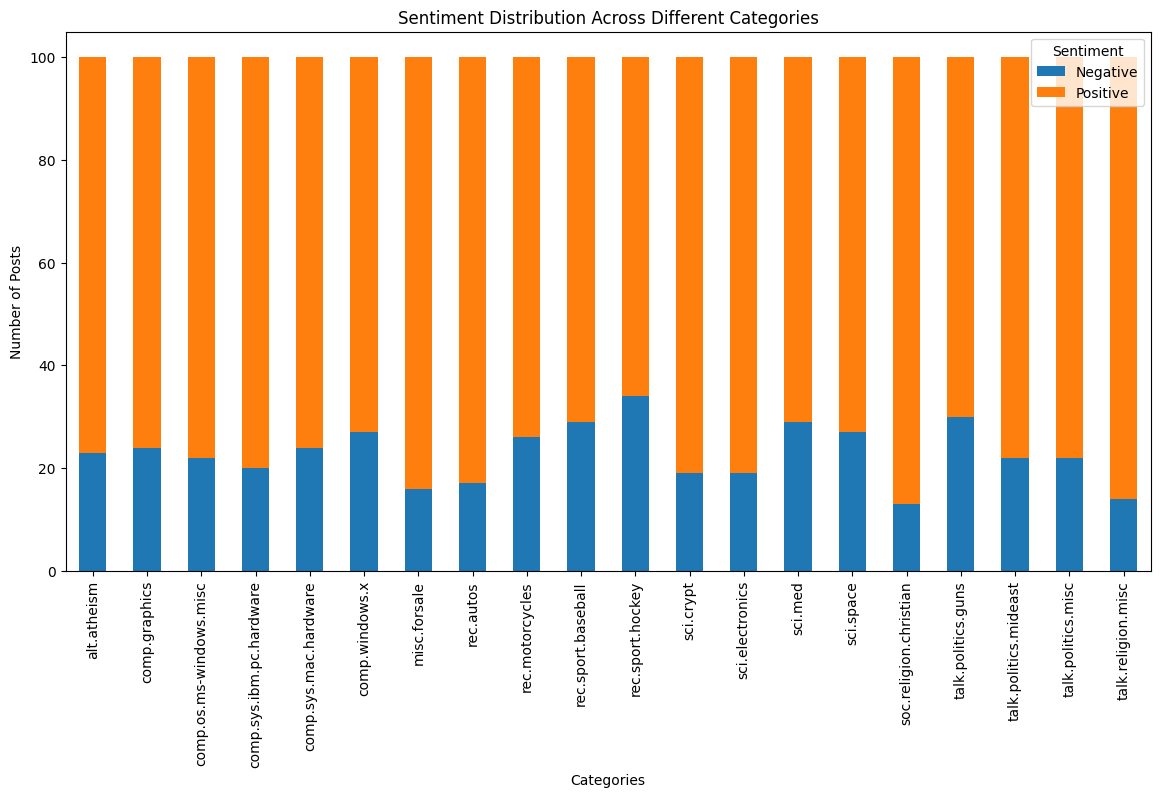

Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey                34        66
sci.crypt                       19        81
sci.electronics                 19        81
sci.med                         29        71
sci.space                       27        73
soc.religion.christian          13        87
talk.politics.guns              30        70
talk.politics.mideast           22        78
talk.politics.misc              22        78
talk.religion.misc              14        86


In [7]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('blogs.csv')

# Define a function to categorize sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the sentiment function to the 'Data' column
df['Sentiment'] = df['Data'].apply(get_sentiment)

# Examine the distribution of sentiments across different categories
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)

# Plot the sentiment distribution
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Sentiment Distribution Across Different Categories')
plt.xlabel('Categories')
plt.ylabel('Number of Posts')
plt.show()

# Print the summary of sentiment distribution
print(sentiment_distribution)

In [8]:
# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'Classification Report:\n{report}')

Accuracy: 0.82
Precision: 0.8392047122969989
Recall: 0.82
F1-score: 0.8112472384009909
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.68      0.83      0.75        18
 comp.os.ms-windows.misc       0.95      0.82      0.88        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.95      0.89        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.84      0.89      0.86        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.74      0.94      0.83        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.90      1.00      0.95        19
         sci.electronics       

The Naive Bayes classifier performed well with an overall accuracy of 82%, but performance varied across different categories. Precision, recall, and F1-score indicate that while the model is generally effective, there are specific categories where performance could be improved.

Addressing challenges such as class imbalance and exploring alternative feature extraction methods or models could further enhance the classification performance.

**Observations from Sentiment Analysis**

**Overall Sentiment:**

The majority of blog posts in most categories have a positive sentiment. This is indicative of a generally positive tone or outlook in the content of these blogs.

**Category-Specific Sentiments:**

**alt.atheism:** Has a significant number of negative posts (23) compared to other categories, though still more positive posts (77).

**rec.sport.hockey:** Has the highest number of negative posts (34) compared to other categories, but still more positive posts (66).

**soc.religion.christian:** Shows a strong positive sentiment (87) with very few negative posts (13).

**misc.forsale and rec.autos:** Have high positive sentiment (84 and 83 respectively) and fewer negative posts (16 and 17 respectively).

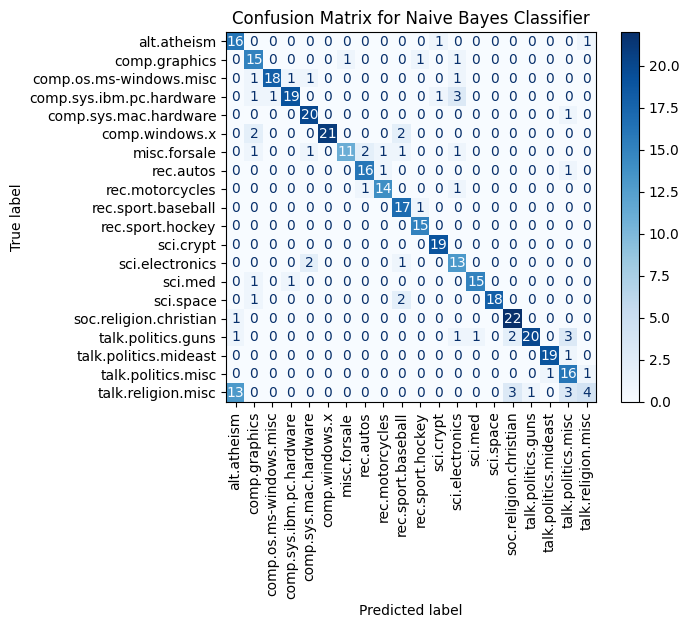

In [11]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('blogs.csv')

# Define a function for basic preprocessing
def basic_preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    tokens = text.split()
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]  # Remove stopwords
    text = ' '.join(tokens)  # Join tokens back to string
    return text

# Apply basic preprocessing to the 'Data' column
df['Processed_Data'] = df['Data'].apply(basic_preprocess)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text data
X = tfidf_vectorizer.fit_transform(df['Processed_Data'])

# Convert the labels to a numerical format
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Labels'])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model on the training set
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [12]:
# Function to plot word cloud
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

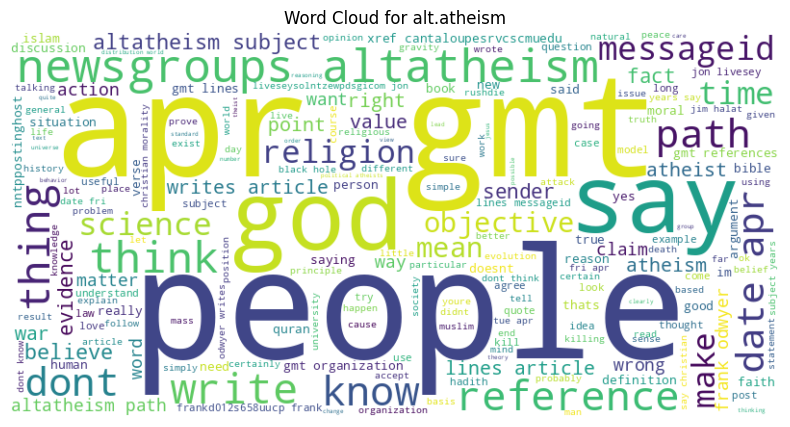

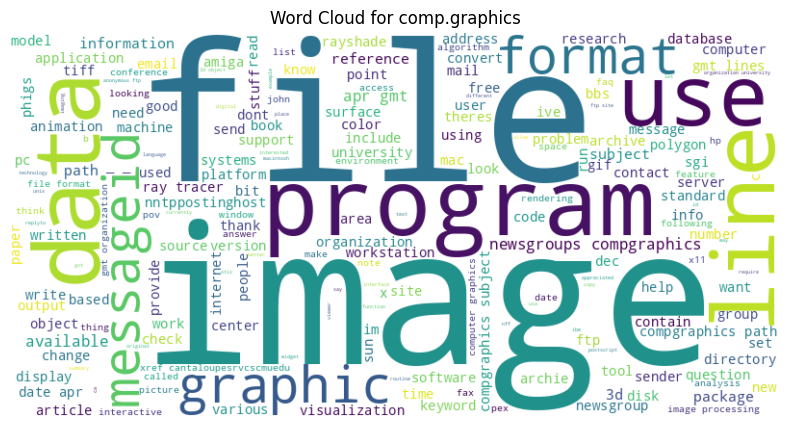

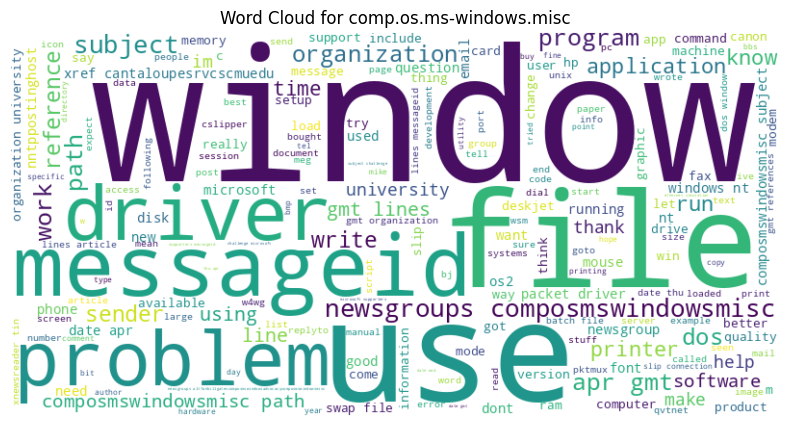

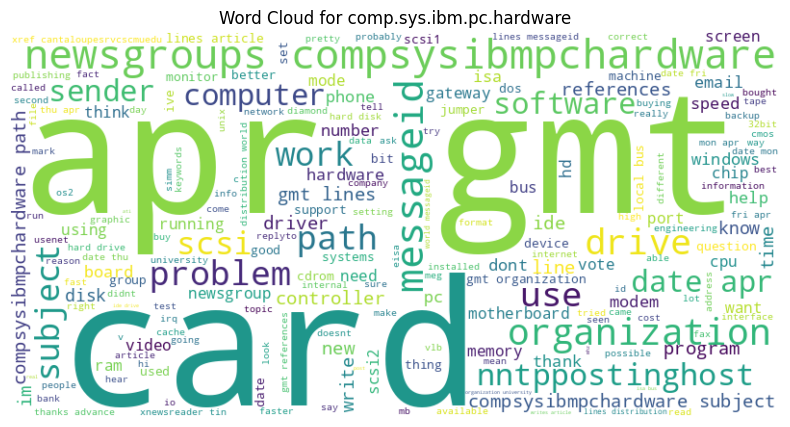

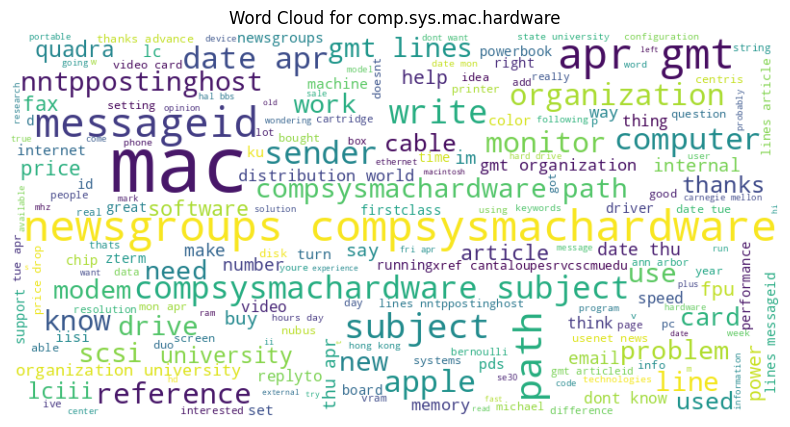

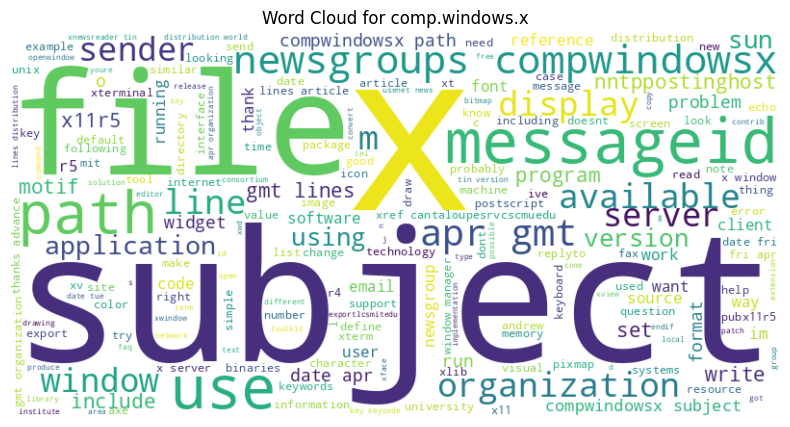

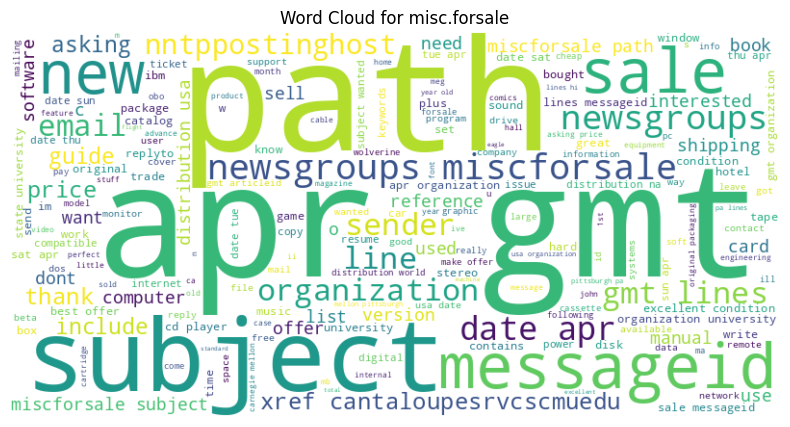

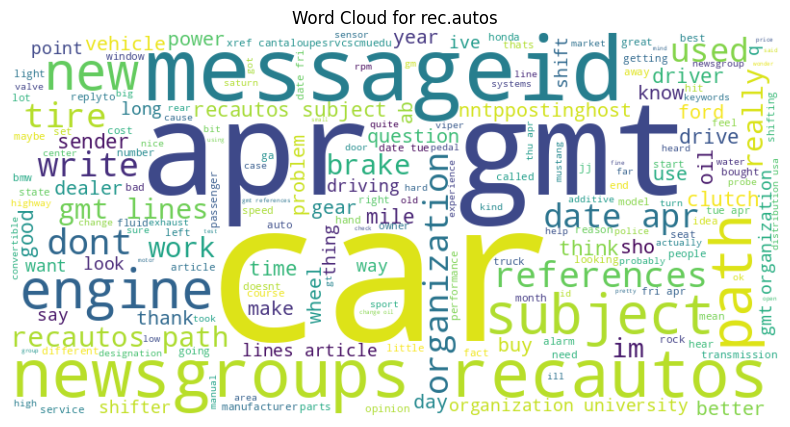

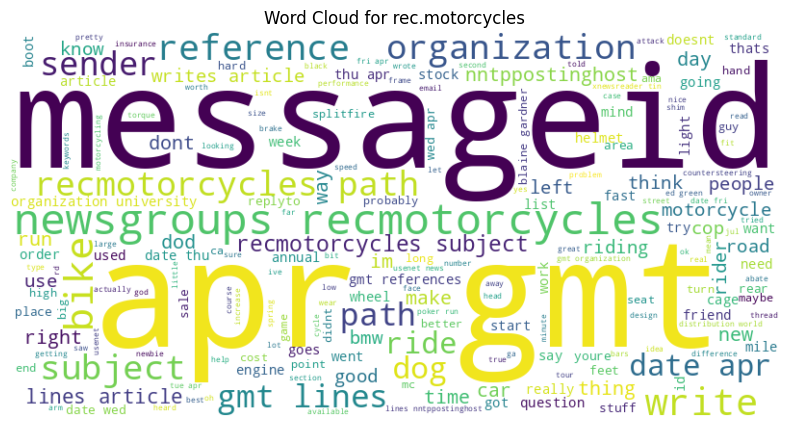

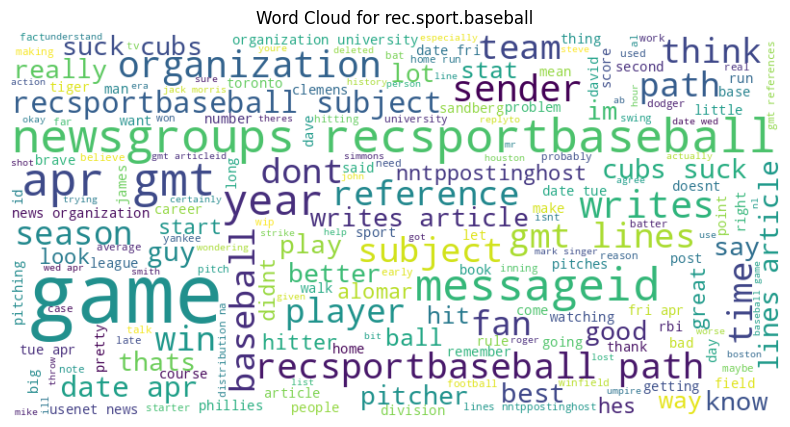

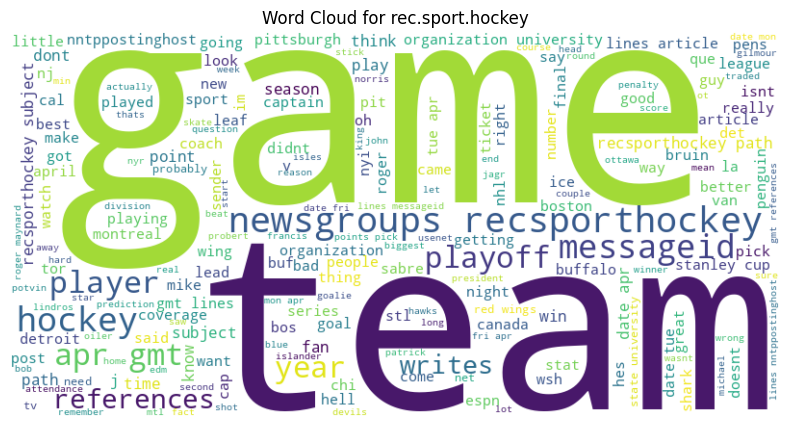

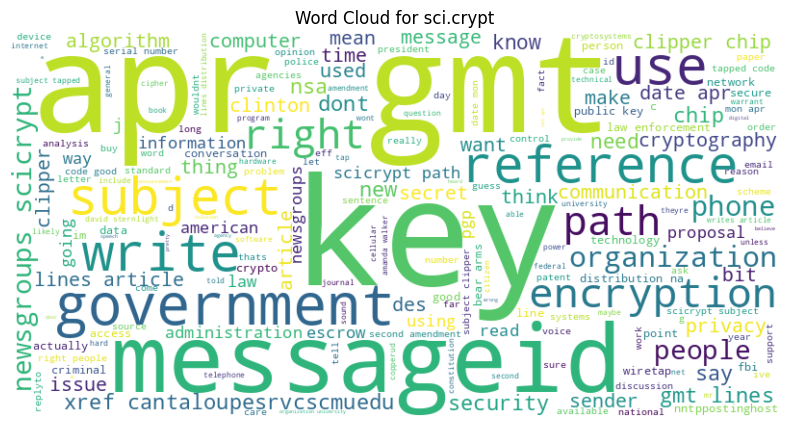

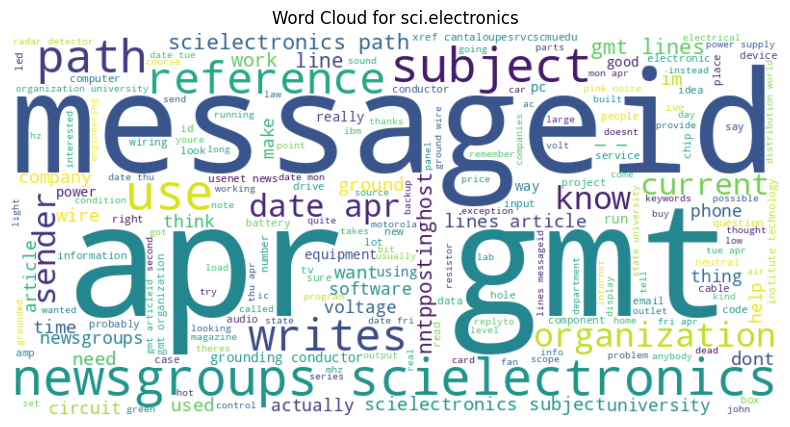

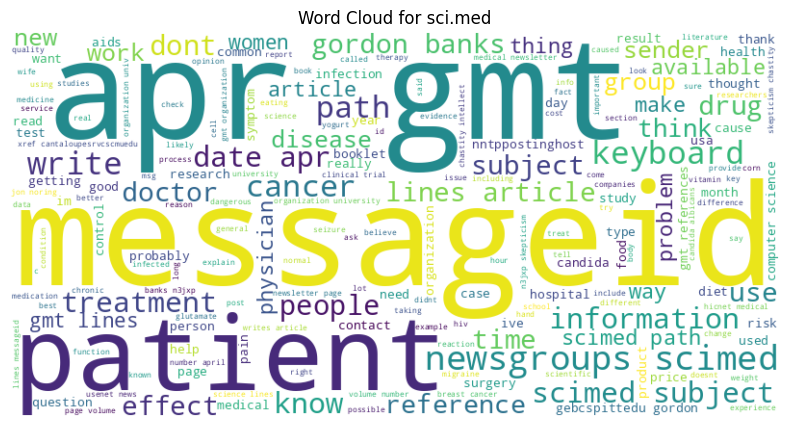

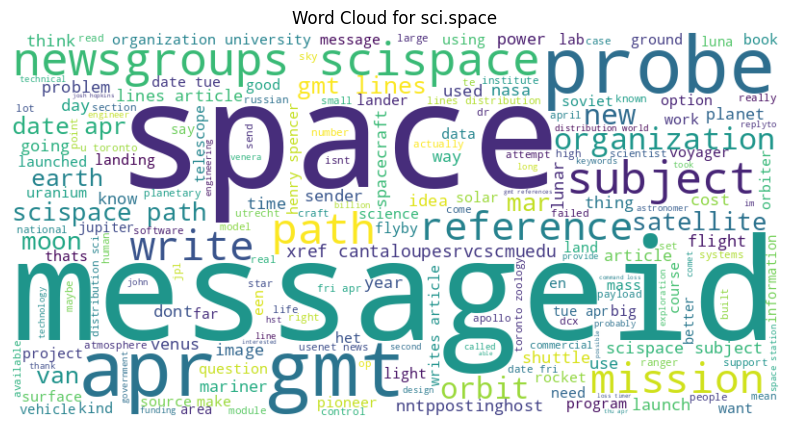

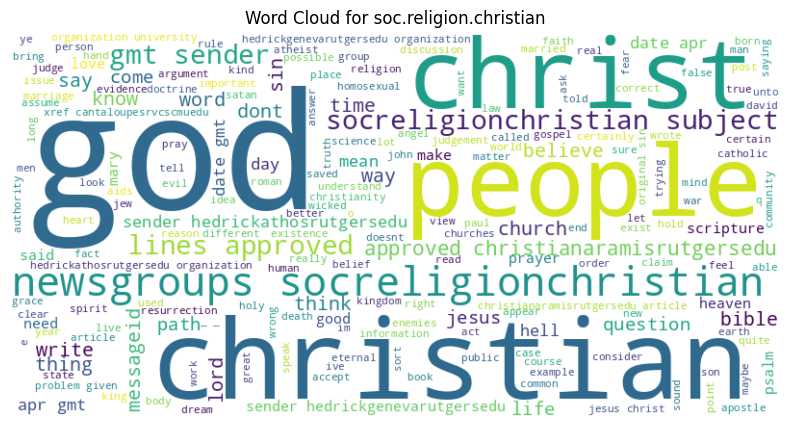

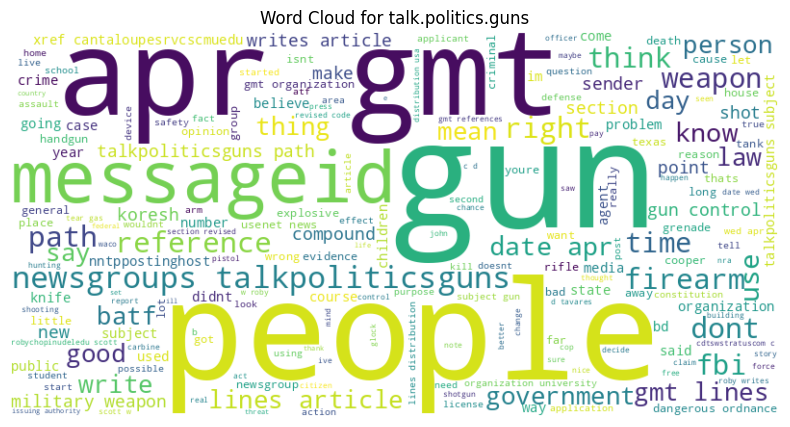

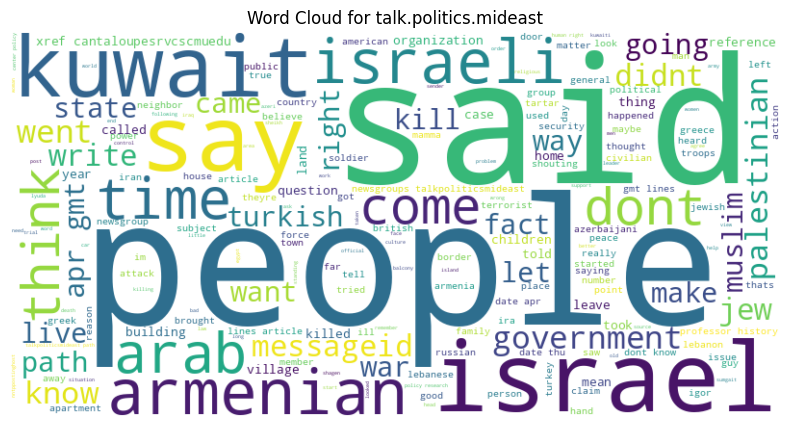

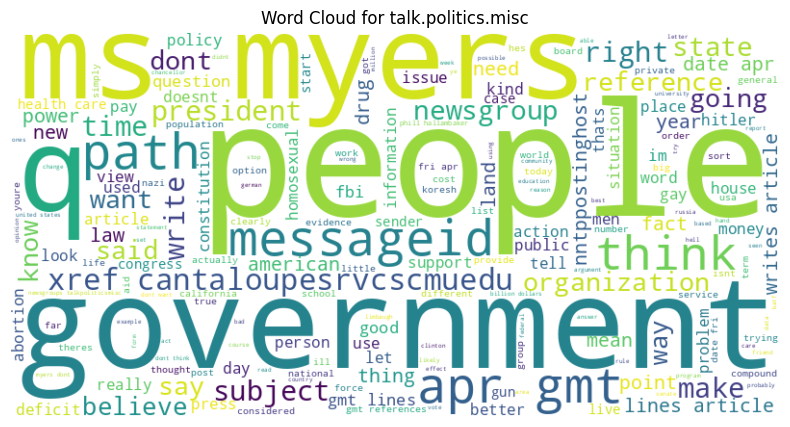

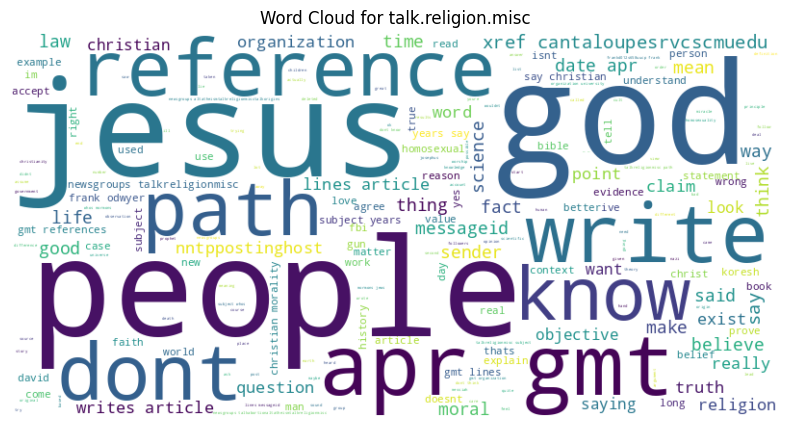

In [13]:
# Generate and plot word clouds for each category
for category in df['Labels'].unique():
    text = ' '.join(df[df['Labels'] == category]['Processed_Data'])
    plot_word_cloud(text, title=f'Word Cloud for {category}')